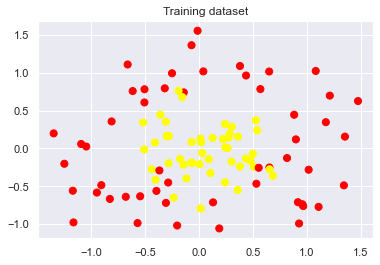

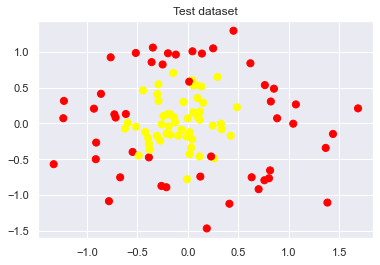

In [24]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X, y = make_circles(200, factor=0.2, noise=0.3, random_state=1) 
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.5)
plt.title('Training dataset')
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=50, cmap='autumn')
plt.show()
plt.title('Test dataset')
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, s=50, cmap='autumn') 
plt.show()

# print(x_train)
# print(y_train)

In [25]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
            levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
            model.support_vectors_[:, 1],
            s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [26]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
pca = PCA(n_components=150,whiten=True)
svc = SVC(kernel='rbf',class_weight='balanced')
model = make_pipeline(pca, svc)

In [34]:
from sklearn.svm import SVC
import numpy as np

model = SVC()

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

# 建立一個 dict 來組合要測試的參數
param_grid = {'C':[0.1, 0.5, 1],'gamma':[1, 0.1, 0.01]}

grid = GridSearchCV(SVC(),param_grid)

#利用剛剛設定的參數來找到最適合的模型
grid.fit(x_train,y_train)

print(grid.best_estimator_)

SVC(C=0.1, gamma=1)


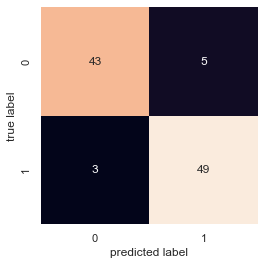

In [22]:
#利用剛剛的最佳參數再重新預測測試組
grid_predictions = grid.predict(x_test)

# use seaborn plotting defaults
import seaborn as sns; sns.set()

mat = confusion_matrix(grid_predictions, y_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('predicted label')
plt.ylabel('true label');